In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Importing datatsets
train_df = pd.read_csv('archive/train.csv')
test_df = pd.read_csv('archive/test.csv')

/var/folders/hp/00w3l6ls0c71n_1yhq5ptylw0000gn/T/ipykernel_97239/3639023529.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('archive/train.csv')


In [34]:
print(train_df.shape)
print(test_df.shape)

(100000, 28)
(50000, 27)


In [35]:
train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [36]:
print(train_df.head())
print(test_df.head())

       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

In [37]:
print(test_df.info())
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [38]:
# Removing irrelevent features
remove_cols = ['ID', 'Customer_ID', 'Name', 'SSN']

train_df.drop(columns=remove_cols, inplace=True)
test_df.drop(columns=remove_cols, inplace=True)

In [39]:
# Converting to the correct datatype
numerical_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
                  'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                  'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

cat_cols = ['Type_of_Loan', 'Credit_Mix',
            'Payment_Behaviour', 'Credit_History_Age']

for col in numerical_cols:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
    test_df[col] = pd.to_numeric(test_df[col], errors='coerce')

In [40]:
from sklearn.impute import SimpleImputer
# Imputing missing values
num_imputer = SimpleImputer(strategy='median')
train_df[numerical_cols] = num_imputer.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = num_imputer.fit_transform(test_df[numerical_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
train_df[cat_cols] = cat_imputer.fit_transform(train_df[cat_cols])
test_df[cat_cols] = cat_imputer.fit_transform(test_df[cat_cols])

In [52]:
from scipy import stats

# Removing any noticeable outliers
train_df = train_df[(train_df['Age'] > 0) & (train_df['Age'] < 100)]

# Removing other outliers based on z-scores
for col in numerical_cols:
    z = np.abs(stats.zscore(train_df[col]))
    train_df = train_df[z <= 2]

train_df.reset_index(drop=True, inplace=True)

In [53]:
train_df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,40210.000000,40210.000000,40210.000000,40210.000000,40210.000000,40210.000000,40210.000000,40210.000000,40210.000000,40210.000000,40210.000000,40210.000000,40210.000000,40210.000000,40210.000000,40210.000000
mean,32.980453,32451.017457,2713.098232,5.003855,5.183711,12.965133,3.079234,16.488088,12.620492,9.437529,5.192514,1039.571226,31.942471,69.828775,121.306570,349.533577
std,10.027135,17643.699112,1371.463494,2.372541,1.888284,7.820360,2.019943,9.317564,5.479420,5.053894,3.502928,652.822852,4.949544,87.740608,71.258993,93.257332
min,14.000000,7005.930000,332.128333,-1.000000,0.000000,1.000000,0.000000,-4.000000,-3.000000,-1.070000,0.000000,0.560000,22.104425,0.000000,0.000000,132.999204
25%,25.000000,18192.400000,1597.350000,3.000000,4.000000,7.000000,2.000000,9.000000,9.000000,5.540000,2.000000,498.610000,27.768870,21.253239,65.311856,281.775385
50%,33.000000,30805.980000,2723.292917,5.000000,5.000000,12.000000,3.000000,15.000000,13.000000,9.310000,5.000000,1013.790000,31.936479,45.649894,113.755494,333.139426
75%,41.000000,39343.020000,3141.606667,7.000000,7.000000,18.000000,4.000000,24.000000,16.000000,12.800000,8.000000,1427.560000,36.143027,85.277083,156.748963,407.790172
max,53.000000,154493.880000,7056.587500,11.000000,28.000000,81.000000,39.000000,41.000000,28.000000,20.320000,31.000000,2559.020000,41.920614,2026.000000,331.996480,599.179162


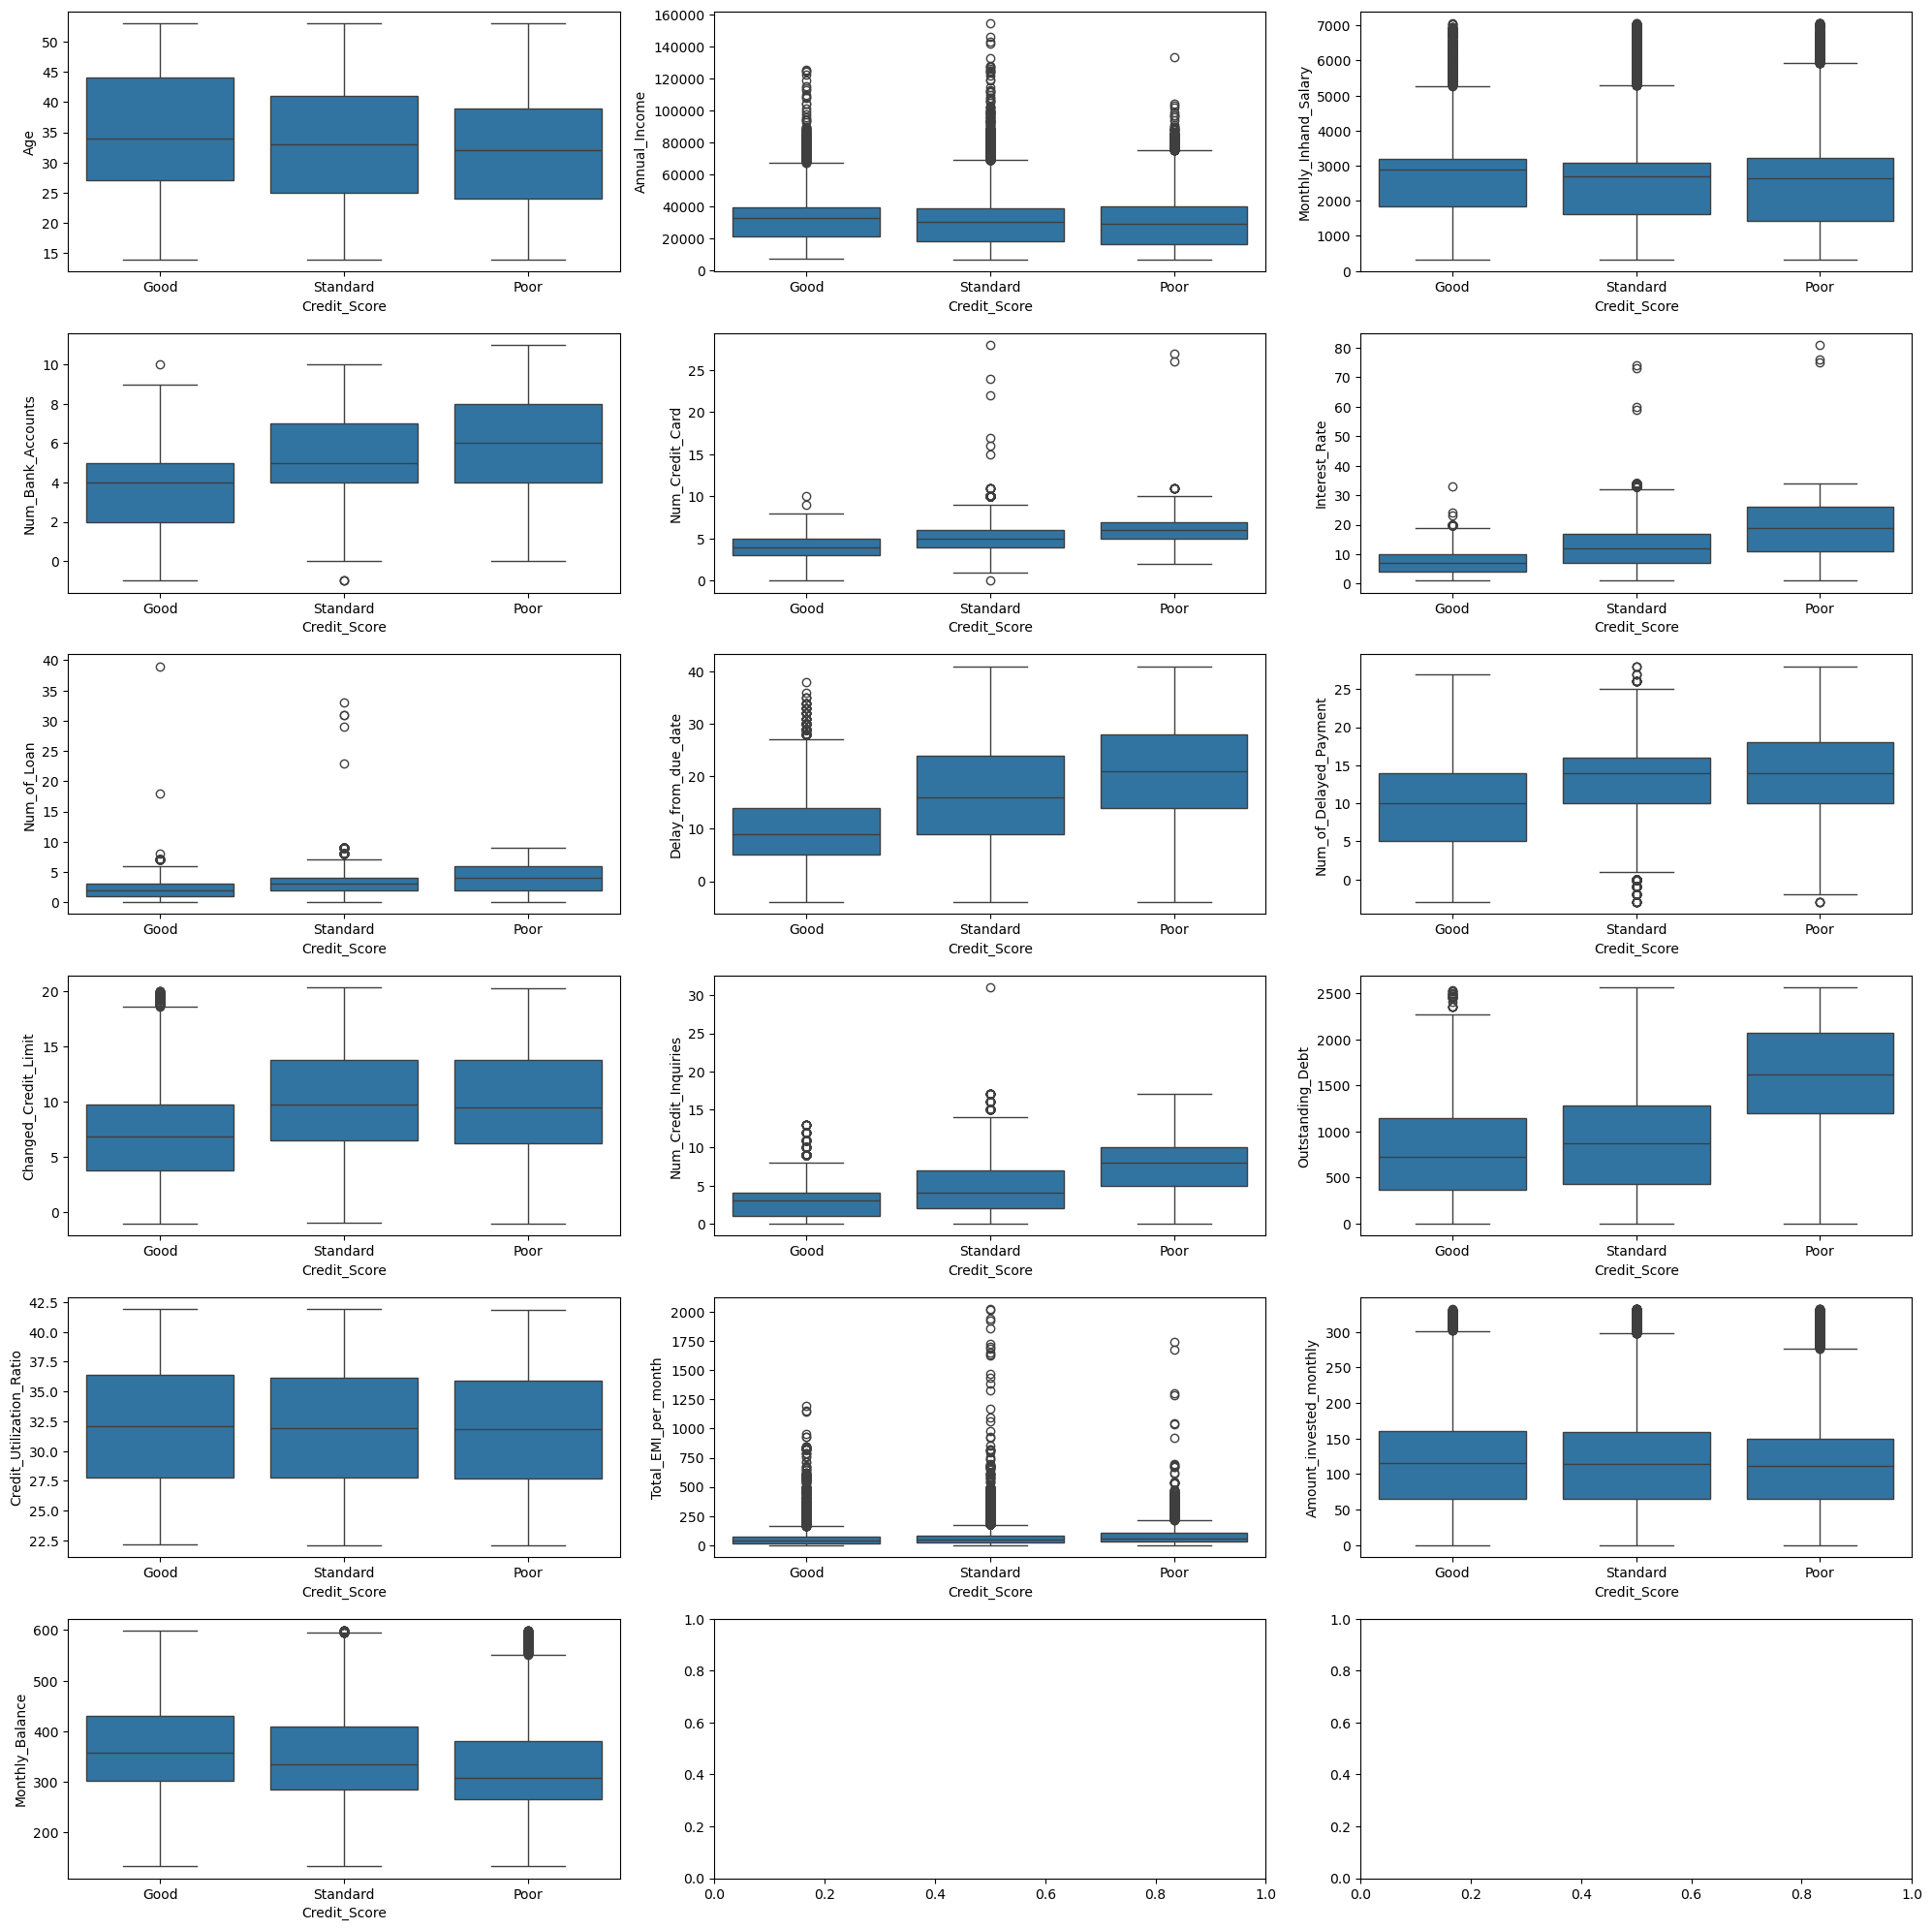

In [55]:
# Visualising data
fig, ax = plt.subplots(6, 3, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=train_df, x='Credit_Score', y=col, ax=ax[i])

plt.tight_layout()
plt.show()

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [57]:
# Train-test split
X = train_df.iloc[:, :-1]
X = X[numerical_cols]
y = train_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [58]:
# Scaling training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [59]:
# Logistic regression model
lrc = LogisticRegression(max_iter=400, random_state=42)
lrc.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=400, random_state=42)

In [75]:
lrc_pred = lrc.predict(X_test_scaled)

In [76]:
lrc_cvs = cross_val_score(lrc, X_train_scaled, y_train).round(2).mean()
lrc_acc = accuracy_score(y_test, lrc_pred)

print(lrc_cvs)
print(lrc_acc)

0.688
0.6816712260631683


In [62]:
# Random Forest model
rfc = RandomForestClassifier(
    n_estimators=200, random_state=42, criterion='entropy')
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)

In [77]:
rfc_pred = rfc.predict(X_test_scaled)

In [79]:
rfc_cvs = cross_val_score(rfc, X_train_scaled, y_train).round(2).mean()
rfc_acc = accuracy_score(y_test, rfc_pred)

print(rfc_cvs)
print(rfc_acc)

0.786
0.7868689380751057


In [ ]:
estimators = []
accuracies = []

for i in range(50, 500, 50):
    rfc_v2 = RandomForestClassifier(
        n_estimators=i, random_state=42, criterion='entropy')
    rfc_v2.fit(X_train_scaled, y_train)

    pred = rfc_v2.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, pred)
    accuracies.append(accuracy)
    estimators.append(i)

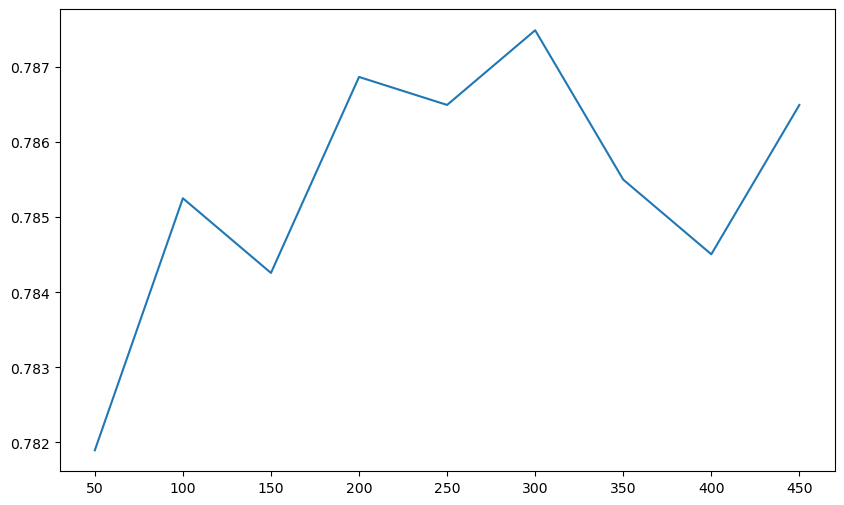

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(estimators, accuracies)

plt.show()

In [ ]:
# Multi-layer perceptron model
mlp = MLPClassifier(hidden_layer_sizes=(10, 5, 3), solver='lbfgs')
mlp.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(10, 5, 3), solver='lbfgs')

In [ ]:
mlp_pred = mlp.predict(X_test_scaled)

In [80]:
mlp_cvs = cross_val_score(mlp, X_train_scaled, y_train).round(2).mean()
mlp_acc = accuracy_score(y_test, mlp_pred)

print(mlp_cvs)
print(mlp_acc)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

0.708
0.6938572494404377


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
mlp_v2 = MLPClassifier((20, 10, 10, 3), learning_rate='adaptive',
                       max_iter=500, solver='adam', alpha=0.001)

mlp_v2.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(20, 10, 10, 3),
              learning_rate='adaptive', max_iter=500)

In [90]:
mlp_v2_pred = mlp_v2.predict(X_test_scaled)

In [91]:
mlp_v2_cvs = cross_val_score(mlp_v2, X_train_scaled, y_train).round(2).mean()
mlp_v2_acc = accuracy_score(y_test, mlp_v2_pred)

In [92]:
print(mlp_v2_cvs)
print(mlp_v2_acc)

0.7139999999999999
0.7087789107187267


   Logistic R  Random Forest  Perceptron
0    0.681671       0.786869    0.708779


(0.5, 0.85)

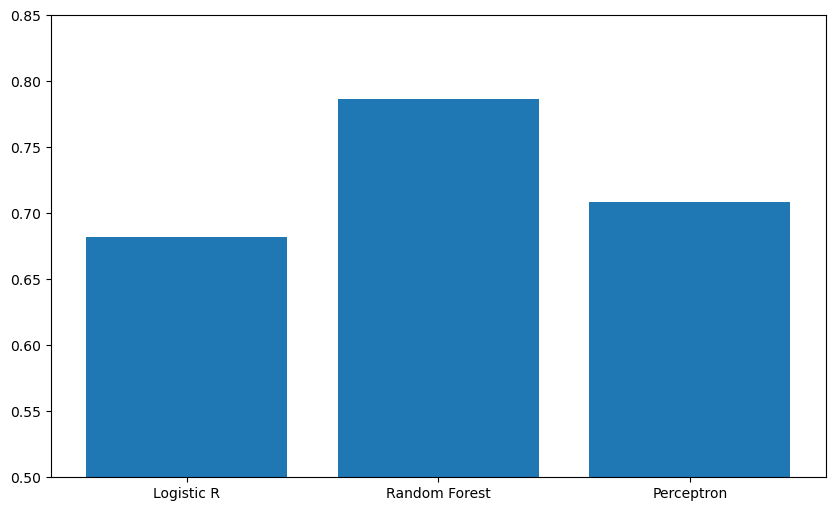

In [ ]:
comparisons = pd.DataFrame({'Logistic R': [lrc_acc], 'Random Forest': [
                           rfc_acc], 'Perceptron': [mlp_v2_acc]})
plt.figure(figsize=(10, 6))

plt.bar(comparisons.columns, comparisons.iloc[0])
plt.ylim(0.5, 0.85)